In [1]:
%%time
import malaya

CPU times: user 14.1 s, sys: 2.19 s, total: 16.3 s
Wall time: 22.5 s


In [2]:
positive_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan sebanyak RM50 juta. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
negative_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

All models have `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is False.**

All models have `add_neutral` parameters.
If True, it will add `neutral` probability, Else, default probabilities. **Default is True.**

## Load multinomial model

In [3]:
model = malaya.sentiment.multinomial()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.003559988321312934, 'positive': 0.6440011678687021, 'neutral': 0.352438843809985}
{'negative': 0.4770205083402397, 'positive': 0.005229794916597557, 'neutral': 0.5177496967431627}


[{'negative': 0.4770205083402397,
  'positive': 0.005229794916597557,
  'neutral': 0.5177496967431627},
 {'negative': 0.4770205083402397,
  'positive': 0.005229794916597557,
  'neutral': 0.5177496967431627}]

Disable `neutral` probability,

In [4]:
print(model.predict(negative_text,get_proba=True,add_neutral=True))
print(model.predict(negative_text,get_proba=True,add_neutral=False))

{'negative': 0.4770205083402397, 'positive': 0.005229794916597557, 'neutral': 0.5177496967431627}
{'negative': 0.7385102541701198, 'positive': 0.26148974582987783}


## Load xgb model

In [5]:
model = malaya.sentiment.xgb()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.0045786616, 'positive': 0.5421338, 'neutral': 0.45328754}
{'negative': 0.688568, 'positive': 0.0031143208, 'neutral': 0.30831766}


[{'negative': 0.688568, 'positive': 0.0031143208, 'neutral': 0.30831766},
 {'negative': 0.688568, 'positive': 0.0031143208, 'neutral': 0.30831766}]

## List available deep learning models

In [6]:
malaya.sentiment.available_deep_model()

['self-attention', 'bahdanau', 'luong']

## Load deep learning models

Good thing about deep learning models from Malaya, it returns `Attention` result, means, which part of words give the high impact to the results. But to get `Attention`, you need to set `get_proba=True`.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load bahdanau model

In [8]:
model = malaya.sentiment.deep_model('bahdanau')

#### Predict single string

In [9]:
model.predict(positive_text)

'positive'

In [10]:
result = model.predict(positive_text,get_proba=True,add_neutral=False)
result

{'negative': 0.17075859,
 'positive': 0.82924145,
 'attention': {'Kerajaan': 0.0017302582,
  'negeri': 0.0014580223,
  'Kelantan': 0.41723233,
  'mempersoalkan': 0.003690172,
  'motif': 0.008215976,
  'kenyataan': 0.0018074784,
  'Menteri': 0.0024031366,
  'Kewangan': 0.0015805368,
  'Lim': 0.06009012,
  'Guan': 0.03822874,
  'Eng': 0.010624379,
  'yang': 0.0013287141,
  'hanya': 0.002750063,
  'menyebut': 0.002319276,
  'penerima': 0.0013392554,
  'terbesar': 0.0013263403,
  'bantuan': 0.001772588,
  'kewangan': 0.0014033007,
  'dari': 0.0014002207,
  'Persekutuan': 0.001944176,
  'sebanyak': 0.0013021014,
  'RM50': 0.03411034,
  'juta': 0.002792755,
  '.': 0.0,
  'Sedangkan': 0.0013984512,
  'menurut': 0.0013409941,
  'Timbalan': 0.0018430866,
  'Besarnya': 0.0013005446,
  ',': 0.0,
  'Datuk': 0.001310686,
  'Mohd': 0.0013034152,
  'Amar': 0.0013183507,
  'Nik': 0.0014044936,
  'Abdullah': 0.001305138,
  'lain': 0.0014992557,
  'lebih': 0.0030584973,
  'maju': 0.019639261,
  'turut':

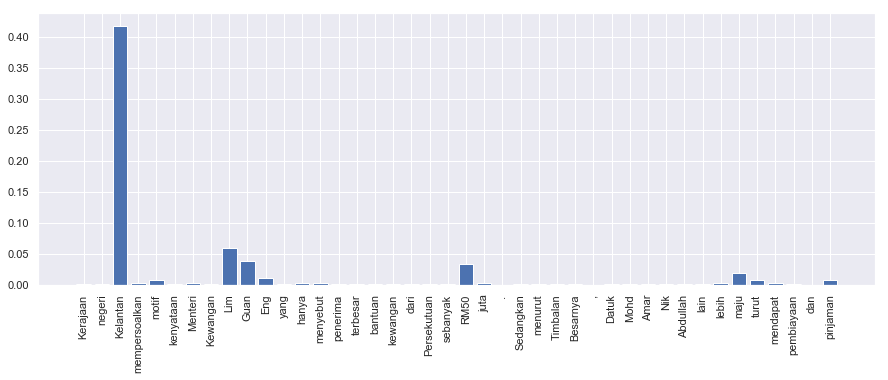

In [11]:
plt.figure(figsize = (15, 5))
keys = result['attention'].keys()
values = result['attention'].values()
aranged = [i for i in range(len(keys))]
plt.bar(aranged, values)
plt.xticks(aranged, keys, rotation = 'vertical')
plt.show()

#### Open sentiment visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [12]:
model.predict_words(positive_text)

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [09/Jun/2019 20:46:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Jun/2019 20:46:23] "GET /static/admin-materialize.min.css HTTP/1.1" 200 -
127.0.0.1 - - [09/Jun/2019 20:46:23] "GET /static/echarts.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jun/2019 20:46:25] "GET /favicon.ico HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 61453)
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/socketserver.py", line 361, in finish_request
    self.Re


stopping Server...


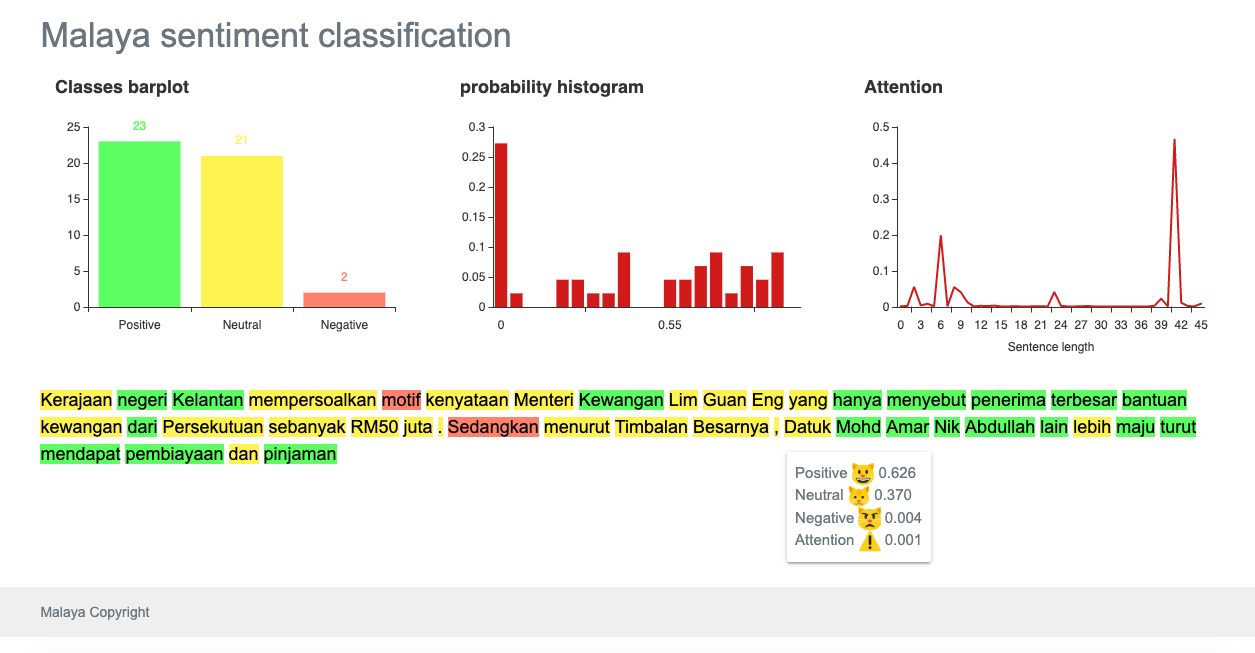

In [15]:
from IPython.core.display import Image, display

display(Image('sentiment-visualization.png', width=800))

I tried to put the html and javascript inside a notebook cell, pretty hard you know and a lot of weird bugs. Let stick to HTTP serving ya.

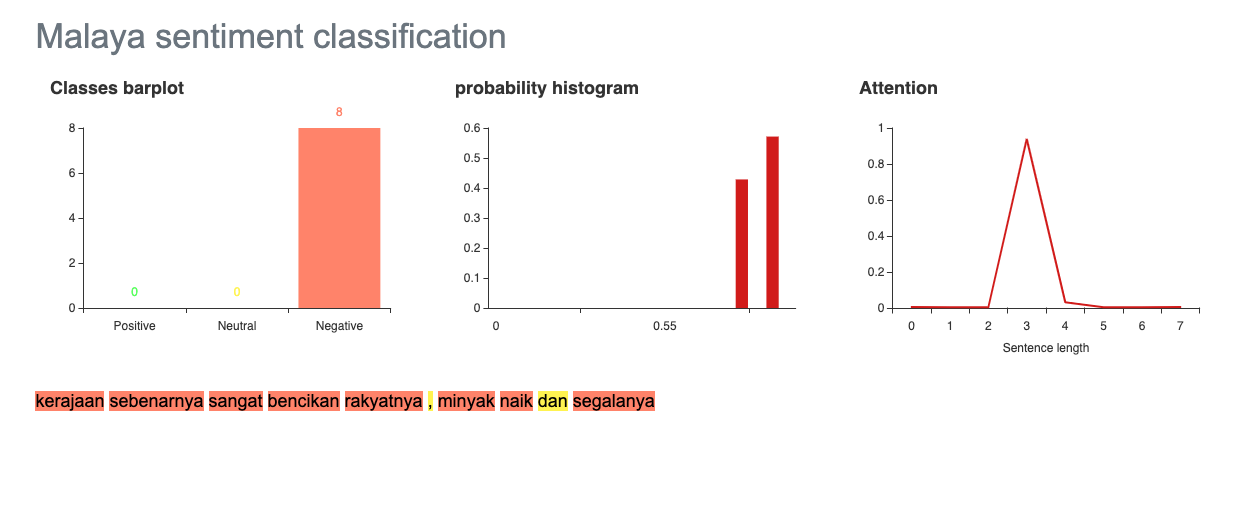

In [16]:
display(Image('sentiment-negative.png', width=800))

`predict_words` only accept a single string. You can't predict multiple texts.

#### Predict batch of strings

In [17]:
model.predict_batch([negative_text, positive_text],get_proba=True)

[{'negative': 0.9585757, 'positive': 0.00041424262, 'neutral': 0.041010022},
 {'negative': 0.004150669, 'positive': 0.58493316, 'neutral': 0.41091615}]

**You might want to try `luong` and `self-attention` by yourself.**

## BERT model

BERT is the best sentiment model in term of accuracy, you can check sentiment accuracy here, https://malaya.readthedocs.io/en/latest/Accuracy.html#sentiment-analysis. But warning, the model size is 700MB! Make sure you have enough resources to use BERT, and installed `bert-tensorflow` first,

```bash
pip3 install bert-tensorflow
```

In [3]:
model = malaya.sentiment.bert()

In [4]:
model.predict_batch([negative_text, positive_text],get_proba=True)

[{'negative': 0.83860207, 'positive': 0.0016139797, 'neutral': 0.15978396},
 {'negative': 0.0004839497, 'positive': 0.95160496, 'neutral': 0.047911108}]

Methods available for BERT model are same as deep learning model, `predict` and `predict_batch` only, no `predict_words`.

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [18]:
multinomial = malaya.sentiment.multinomial()
xgb = malaya.sentiment.xgb()
bahdanau = malaya.sentiment.deep_model('bahdanau')

In [19]:
malaya.stack.predict_stack([multinomial, xgb, bahdanau], positive_text)

{'negative': 0.004685208305983715,
 'positive': 0.5050760204343339,
 'neutral': 0.46383567002533305}

## Load Sparse deep learning models

What happen if a word not included in the dictionary of the models? like `setan`, what if `setan` appeared in text we want to classify? We found this problem when classifying social media texts / posts. Words used not really a vocabulary-based contextual.

Malaya will treat **unknown words** as `<UNK>`, so, to solve this problem, we need to use N-grams character based. Malaya chose tri-grams until fifth-grams.

```python
setan = ['set', 'eta', 'tan']
```

Sklearn provided easy interface to use n-grams, problem is, it is very sparse, a lot of zeros and not memory efficient. Sklearn returned sparse matrix for the result, lucky Tensorflow already provided some sparse function.

In [20]:
malaya.sentiment.available_sparse_deep_model()

['fast-text-char']

Right now Malaya only provide 1 sparse model, `fast-text-char`. We will try to evolve it.

In [21]:
sparse_model = malaya.sentiment.sparse_deep_model()

INFO:tensorflow:Restoring parameters from /Users/huseinzol/Malaya/sentiment/fast-text-char/model.ckpt


In [22]:
sparse_model.predict(positive_text)

'positive'

In [23]:
sparse_model.predict_batch([positive_text, negative_text])

['positive', 'negative']

In [24]:
sparse_model.predict_batch([positive_text, negative_text],get_proba=True)

[{'negative': 0.24028197, 'positive': 0.759718},
 {'negative': 0.6669313, 'positive': 0.33306876}]

Right now sparse models does not have `neutral` class.